In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [78]:
df=pd.read_csv("vgsales.csv")
df['Name'].value_counts()

Need for Speed: Most Wanted                 12
FIFA 14                                      9
Madden NFL 07                                9
LEGO Marvel Super Heroes                     9
Ratatouille                                  9
                                            ..
Super Robot Taisen D                         1
Crossroad Crisis                             1
Vitamin X                                    1
Gundam Assault Survive                       1
The Fairly OddParents: Breakin' Da Rules     1
Name: Name, Length: 11493, dtype: int64

In [79]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [80]:
df.shape

(16598, 11)

In [81]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


 From description we can observe that year column has missing values  in numerical columns , lets identify null values in entire dataset.

In [82]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [83]:
df.dropna(inplace= True)
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

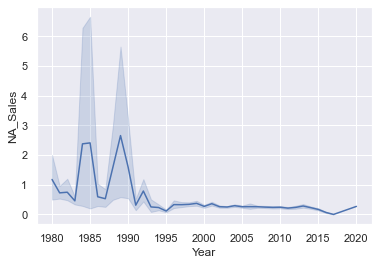

In [84]:
## EDA 
palette = sns.color_palette("mako_r", 6)
sns.lineplot(x=df["Year"], y=df["NA_Sales"],palette=palette)

In [85]:
## Pair plot

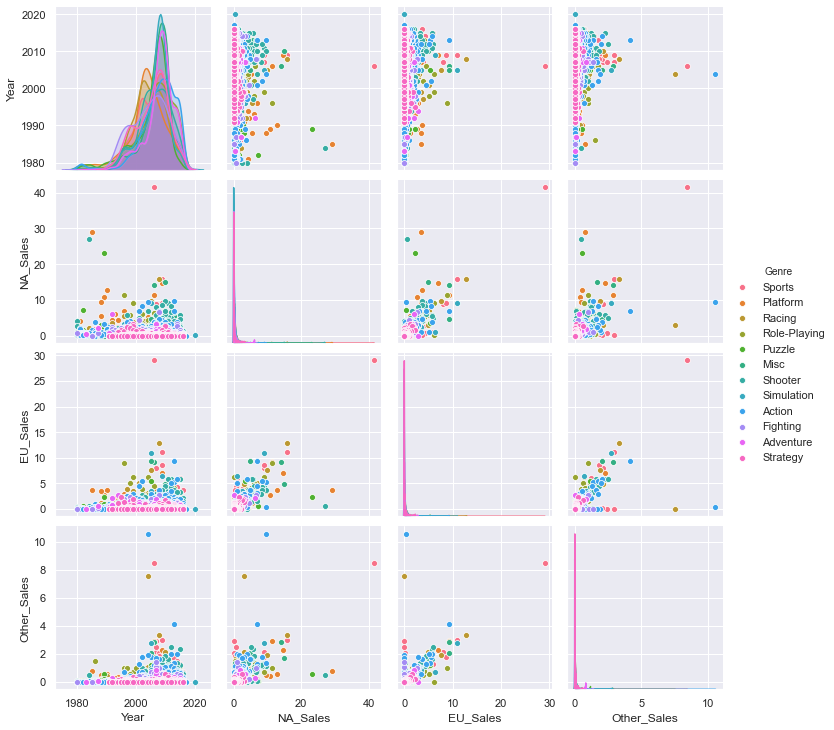

In [86]:
sns.pairplot(df.loc[:,["Year","Platform", "Genre", "NA_Sales","EU_Sales", "Other_Sales"]], hue='Genre')

## Heatmap

Heat map is used to identify the correlation between independent variables and target variables. Also , multicolliniarity between independent variables.

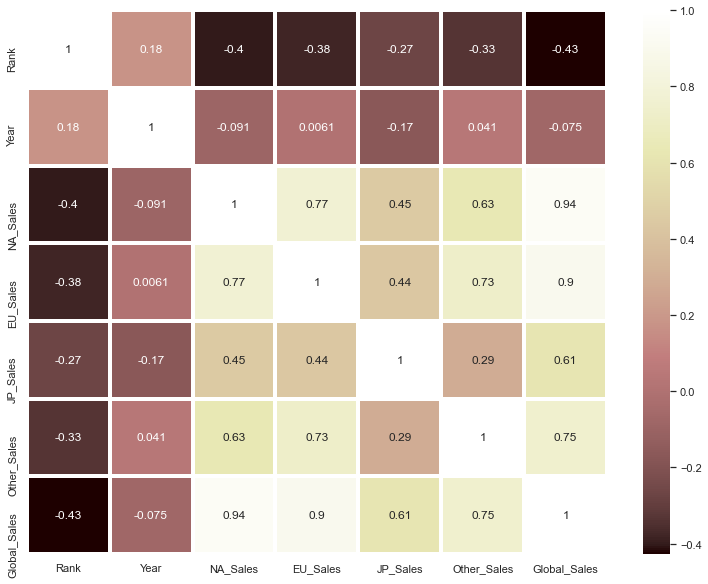

In [87]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(), cmap = "pink", annot=True, linewidth=3)

## Which Genre has highest played?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

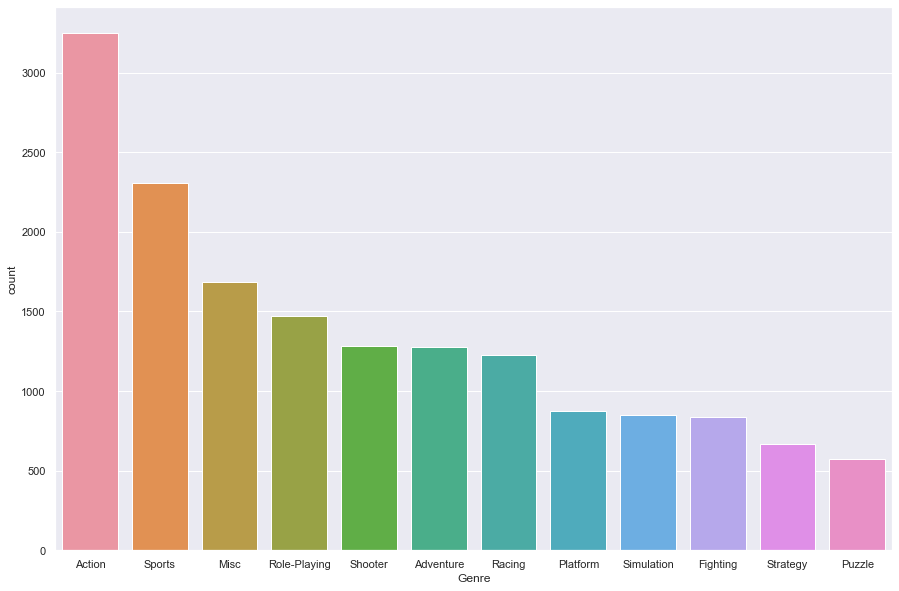

In [88]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Genre", data=df, order = df['Genre'].value_counts().index)
plt.xticks(rotation=0)

Action Genre is highest genre played world wide.

## Identifying top 20 Publishers

Text(0.5, 1.0, 'Top 20 publishers')

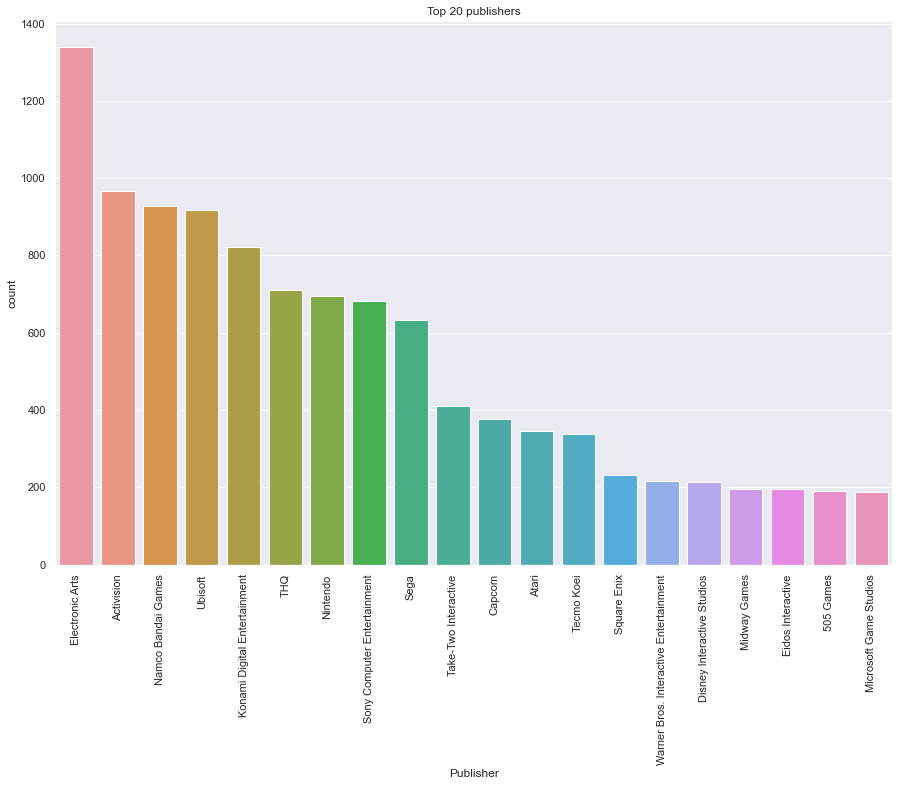

In [89]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Publisher", data=df, order = df['Publisher'].value_counts().index[:20] ,)
plt.xticks(rotation=90)
plt.title('Top 20 publishers')

## What is the highest platform used by most gamers world wide to play  vedio games ?

Text(0.5, 1.0, 'Top 20 publishers')

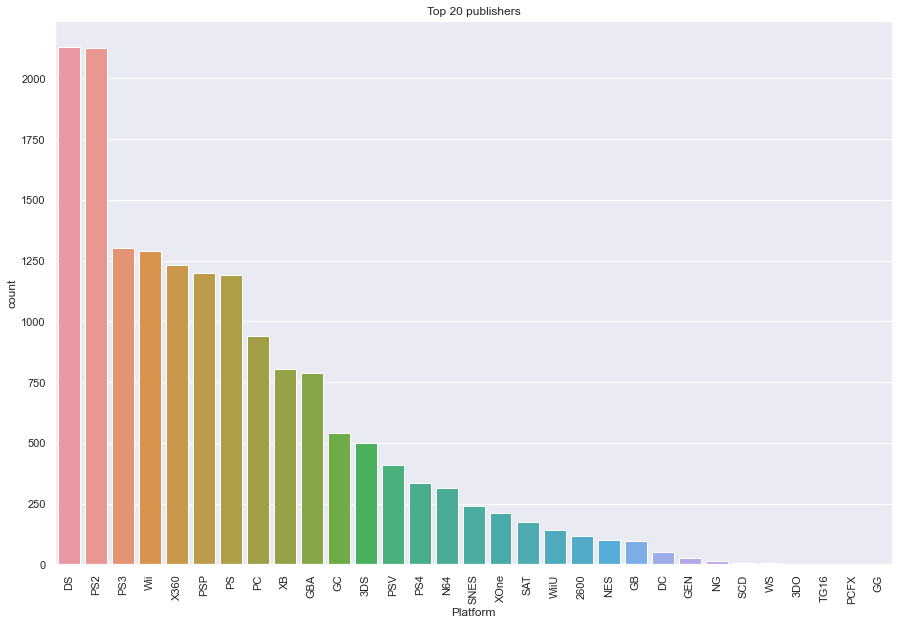

In [90]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Platform",data=df, order = df['Platform'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Top 20 publishers')

DS and PS2  are the highest platforms for playing vedio games world wide.

## How many games played each year from 1980 t0 2020 ?

Text(0.5, 1.0, 'Total games played in each year')

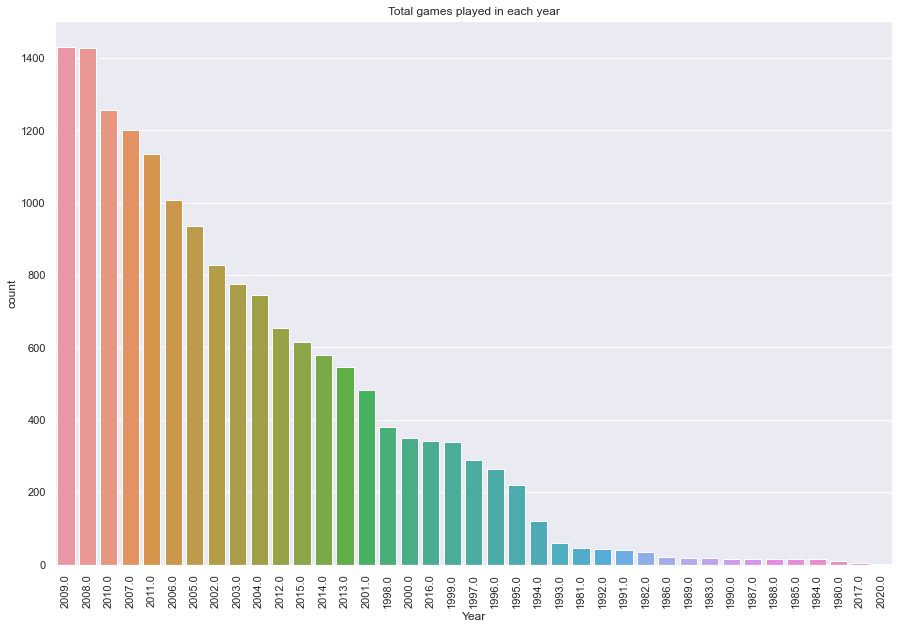

In [91]:


plt.figure(figsize=(15, 10))
sns.countplot(x="Year", data=df, order = df.groupby(by=['Year'])['Name'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.title("Total games played in each year")

In 2009 and 2008 more than 1400 games were played world wide

## What are the Top 10 games played in 2009 and 2008 ?

In [92]:

data1=df.loc[(df['Year'] == 2009)] 
data2=df.loc[(df['Year'] == 2008)]


In [93]:
data1['Name'].value_counts().sort_values(ascending=False).values
#data1['Name'].value_counts()

array([7, 7, 7, ..., 1, 1, 1], dtype=int64)

In [94]:
data1.Name.value_counts().index[:10]

Index(['FIFA Soccer 10', 'Star Wars The Clone Wars: Republic Heroes',
       'Harry Potter and the Half-Blood Prince', 'G-Force', 'Up',
       'Avatar: The Game', 'LEGO Indiana Jones 2: The Adventure Continues',
       'G.I. Joe: The Rise of Cobra', 'Cars: Race-O-Rama',
       'Transformers: Revenge of the Fallen (XBox 360, PS3, & PC Versions)'],
      dtype='object')

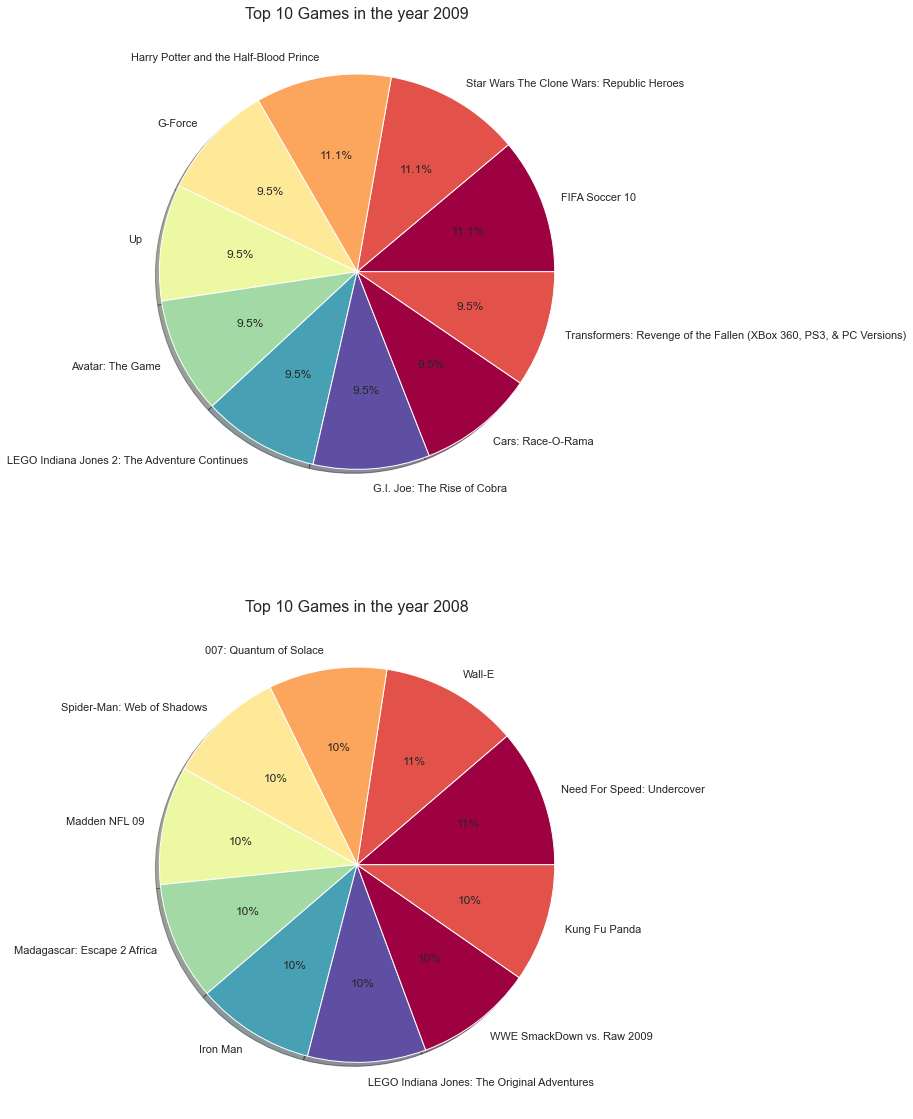

In [95]:
from matplotlib.gridspec import GridSpec
Year_2009_labels = data1.Name.value_counts().index[:10]
Year_2009_values = data1.Name.value_counts().values[:10]

Year_2008_labels = data2.Name.value_counts().index[:10]
Year_2008_values = data2.Name.value_counts().values[:10]

# Make square figures and axes
plt.figure(1, figsize=(20,20))
the_grid = GridSpec(2, 1)


cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]


plt.subplot(the_grid[0, 0], aspect=1, title='2009')
plt.title("Top 10 Games in the year 2009" ,fontsize=16)

pie_2009 = plt.pie(Year_2009_values, labels=Year_2009_labels, autopct='%1.1f%%', shadow=True, colors=colors)


plt.subplot(the_grid[1, 0], aspect=1, title='2008')
plt.title("Top 10 Games in the year 2008",fontsize=16)
pie_2008 = plt.pie(Year_2008_values,labels=Year_2008_labels, autopct='%.0f%%', shadow=True, colors=colors)

#plt.suptitle('Pie Consumption Patterns in the United States', fontsize=16)


plt.show()


## Count of North America games year wise 

Text(0.5, 1.0, 'Total games played in each year')

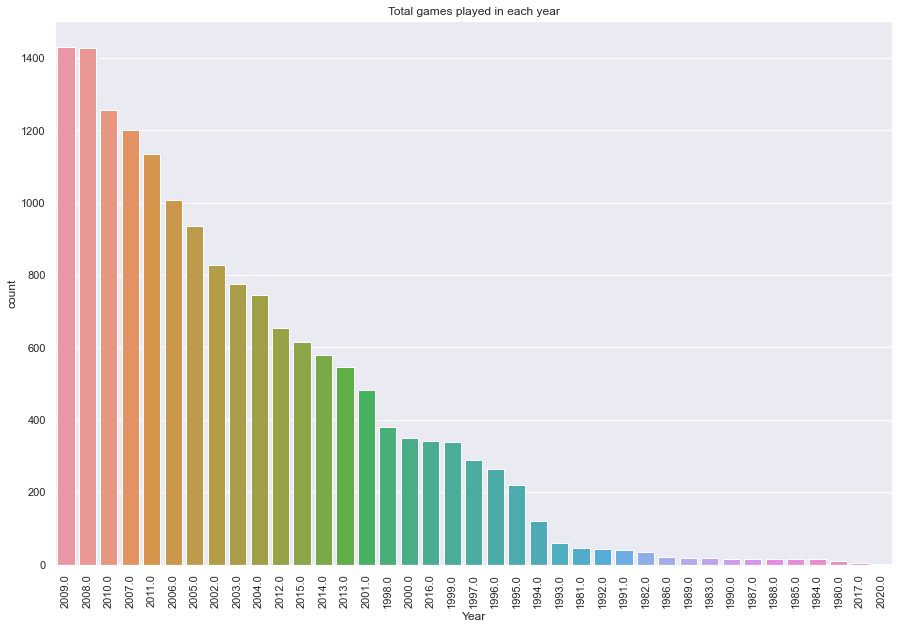

In [96]:



plt.figure(figsize=(15, 10))
sns.countplot(data=df ,x='Year' ,order=df.groupby(by='Year')['NA_Sales'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.title("Total games played in each year")


##  North America sales year wise 

Text(0.5, 1.0, 'Total sales happened in each year')

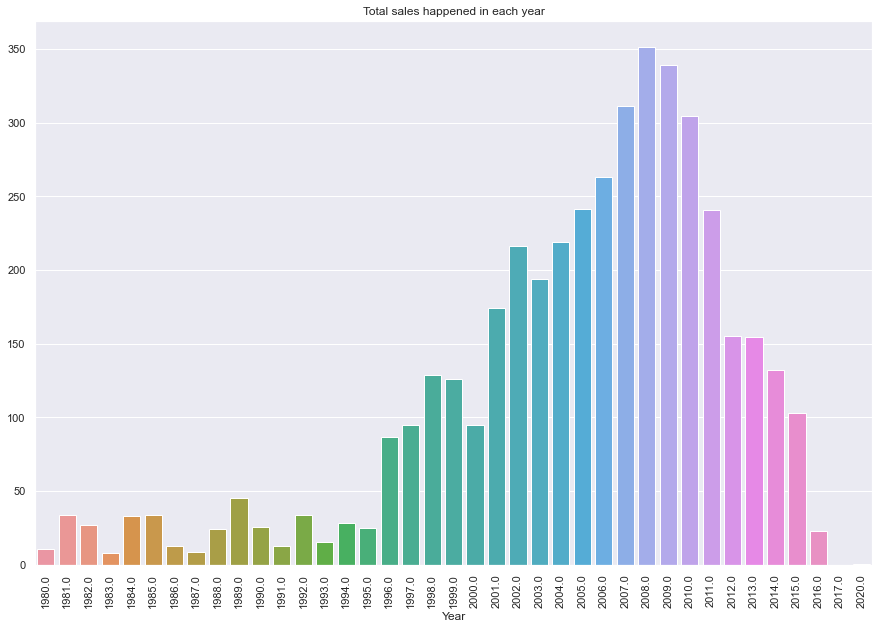

In [99]:


plt.figure(figsize=(15, 10))
sns.barplot(data=df ,x=df.groupby(by='Year')['NA_Sales'].sum().sort_values(ascending=False).index,\
            y=df.groupby(by='Year')['NA_Sales'].sum().sort_values(ascending=False).values )
           
plt.xticks(rotation=90)
plt.title("Total sales happened in each year")


## Europe sales year wise 

Text(0.5, 1.0, 'Total sales happened in each year')

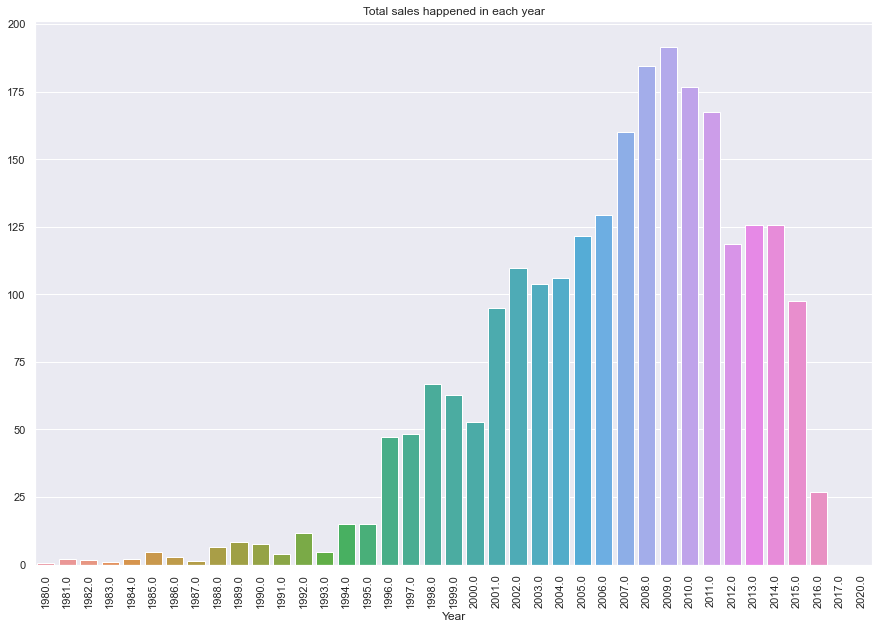

In [100]:


plt.figure(figsize=(15, 10))
sns.barplot(data=df ,x=df.groupby(by='Year')['EU_Sales'].sum().sort_values(ascending=False).index,\
            y=df.groupby(by='Year')['EU_Sales'].sum().sort_values(ascending=False).values )
           
plt.xticks(rotation=90)
plt.title("Total sales happened in each year")


## Japan sales year wise

Text(0.5, 1.0, 'Total sales happened in each year')

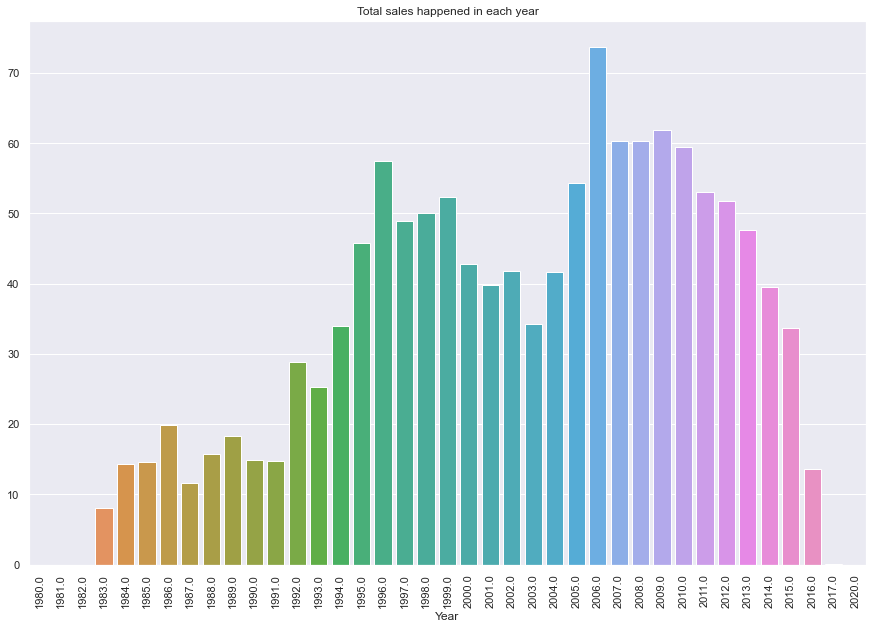

In [102]:
plt.figure(figsize=(15, 10))
sns.barplot(data=df ,x=df.groupby(by='Year')['JP_Sales'].sum().sort_values(ascending=False).index,\
            y=df.groupby(by='Year')['JP_Sales'].sum().sort_values(ascending=False).values )
           
plt.xticks(rotation=90)
plt.title("Total sales happened in each year")


## Other_Sales  year wise 

Text(0.5, 1.0, 'Total sales happened in each year')

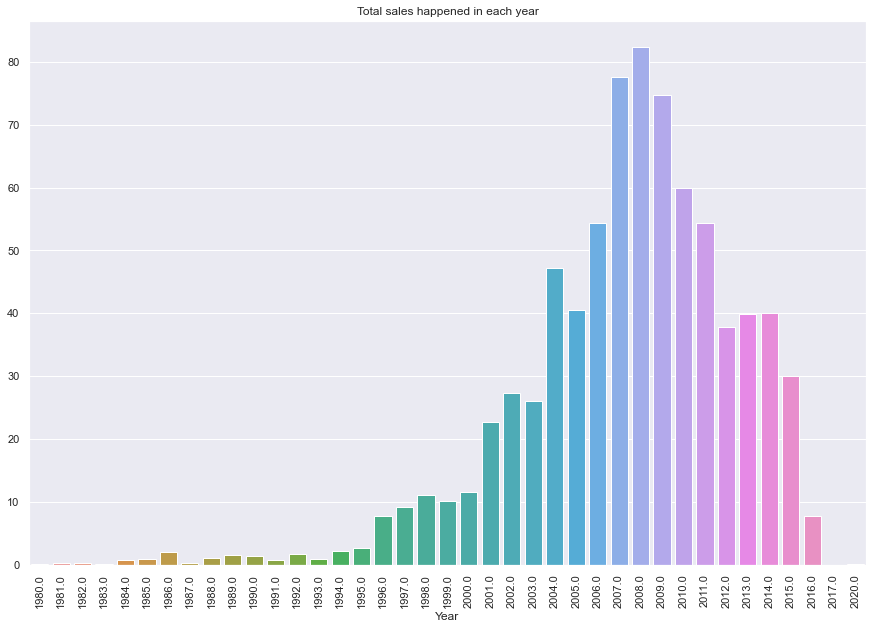

In [103]:



plt.figure(figsize=(15, 10))
sns.barplot(data=df ,x=df.groupby(by='Year')['Other_Sales'].sum().sort_values(ascending=False).index,\
            y=df.groupby(by='Year')['Other_Sales'].sum().sort_values(ascending=False).values )
           
plt.xticks(rotation=90)
plt.title("Total sales happened in each year")


## Global_Sales  year wise 

Text(0.5, 1.0, 'Total sales happened in each year')

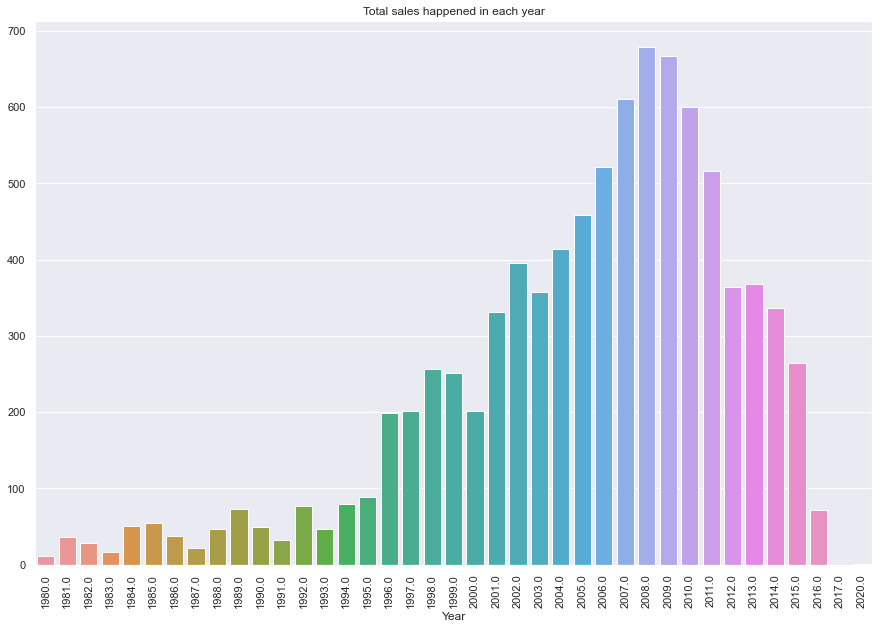

In [104]:



plt.figure(figsize=(15, 10))
sns.barplot(data=df ,x=df.groupby(by='Year')['Global_Sales'].sum().sort_values(ascending=False).index,\
            y=df.groupby(by='Year')['Global_Sales'].sum().sort_values(ascending=False).values )
           
plt.xticks(rotation=90)
plt.title("Total sales happened in each year")


In [105]:
df.groupby('Year')['NA_Sales'].sum().sort_values()

Year
2017.0      0.00
2020.0      0.27
1983.0      7.76
1987.0      8.46
1980.0     10.59
1986.0     12.50
1991.0     12.76
1993.0     15.12
2016.0     22.66
1988.0     23.87
1995.0     24.82
1990.0     25.46
1982.0     26.92
1994.0     28.15
1984.0     33.28
1981.0     33.40
1985.0     33.73
1992.0     33.87
1989.0     45.15
1996.0     86.76
2000.0     94.49
1997.0     94.75
2015.0    102.82
1999.0    126.06
1998.0    128.36
2014.0    131.97
2013.0    154.77
2012.0    154.93
2001.0    173.98
2003.0    193.59
2002.0    216.19
2004.0    218.80
2011.0    241.00
2005.0    241.58
2006.0    263.12
2010.0    304.24
2007.0    311.18
2009.0    338.85
2008.0    351.44
Name: NA_Sales, dtype: float64

## Line plot for total vedio game sales region wise

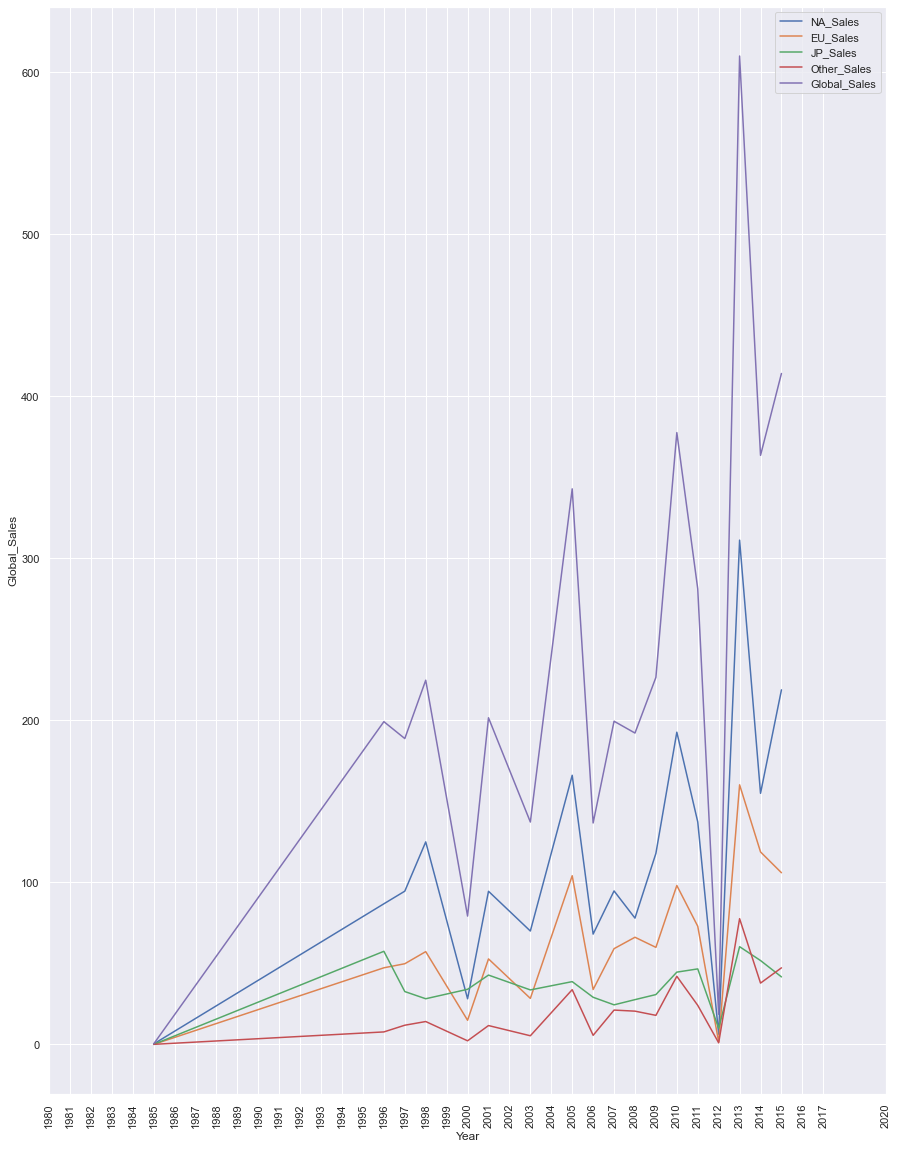

In [106]:
plt.figure(figsize=(15, 20))
sns.lineplot(x=df.Year , y=df.groupby('Year')['NA_Sales'].sum().sort_values(),ci=None,label='NA_Sales')
sns.lineplot(x=df.Year , y=df.groupby('Year')['EU_Sales'].sum().sort_values(),ci=None,label='EU_Sales')
sns.lineplot(x=df.Year , y=df.groupby('Year')['JP_Sales'].sum().sort_values(),ci=None,label='JP_Sales')
sns.lineplot(x=df.Year , y=df.groupby('Year')['Other_Sales'].sum().sort_values(),ci=None,label='Other_Sales')
sns.lineplot(x=df.Year , y=df.groupby('Year')['Global_Sales'].sum().sort_values(),ci=None,label='Global_Sales')
plt.xticks(df.groupby('Year')['NA_Sales'].sum().sort_values().index ,rotation=90)
plt.legend()



## Top 5 years games release by genre.

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

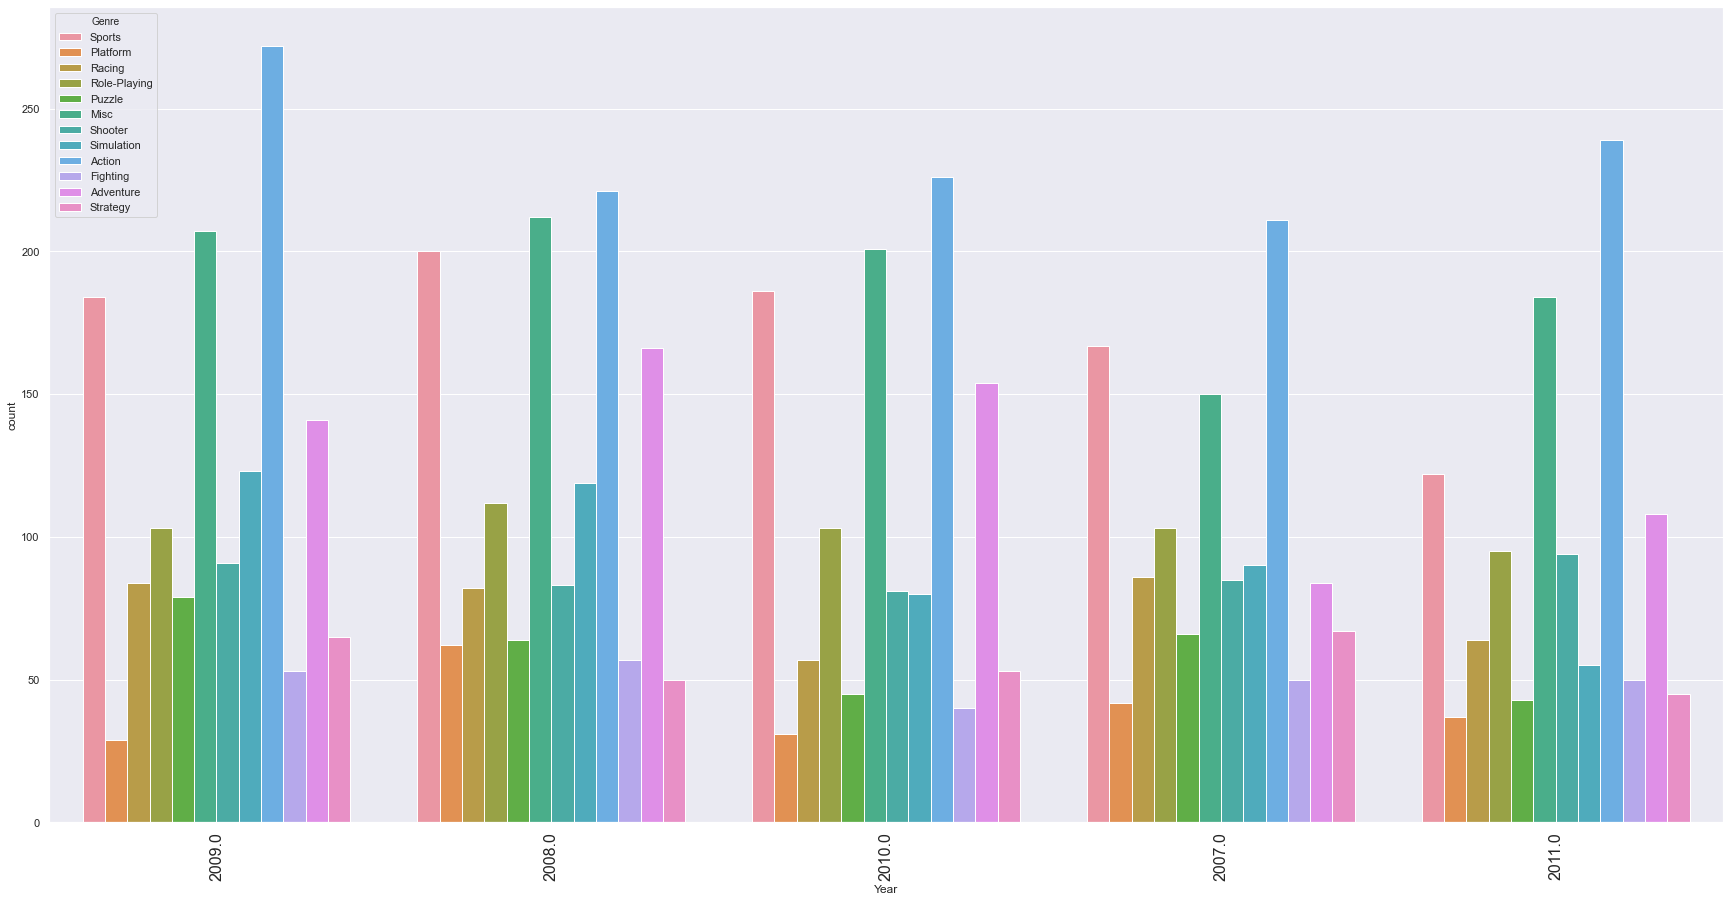

In [107]:
plt.figure(figsize=(30, 15))
sns.countplot(x="Year", data=df, hue='Genre', order=df.Year.value_counts().iloc[:5].index)
plt.xticks(size=16, rotation=90)

## Which genre game got released the most in a single year?

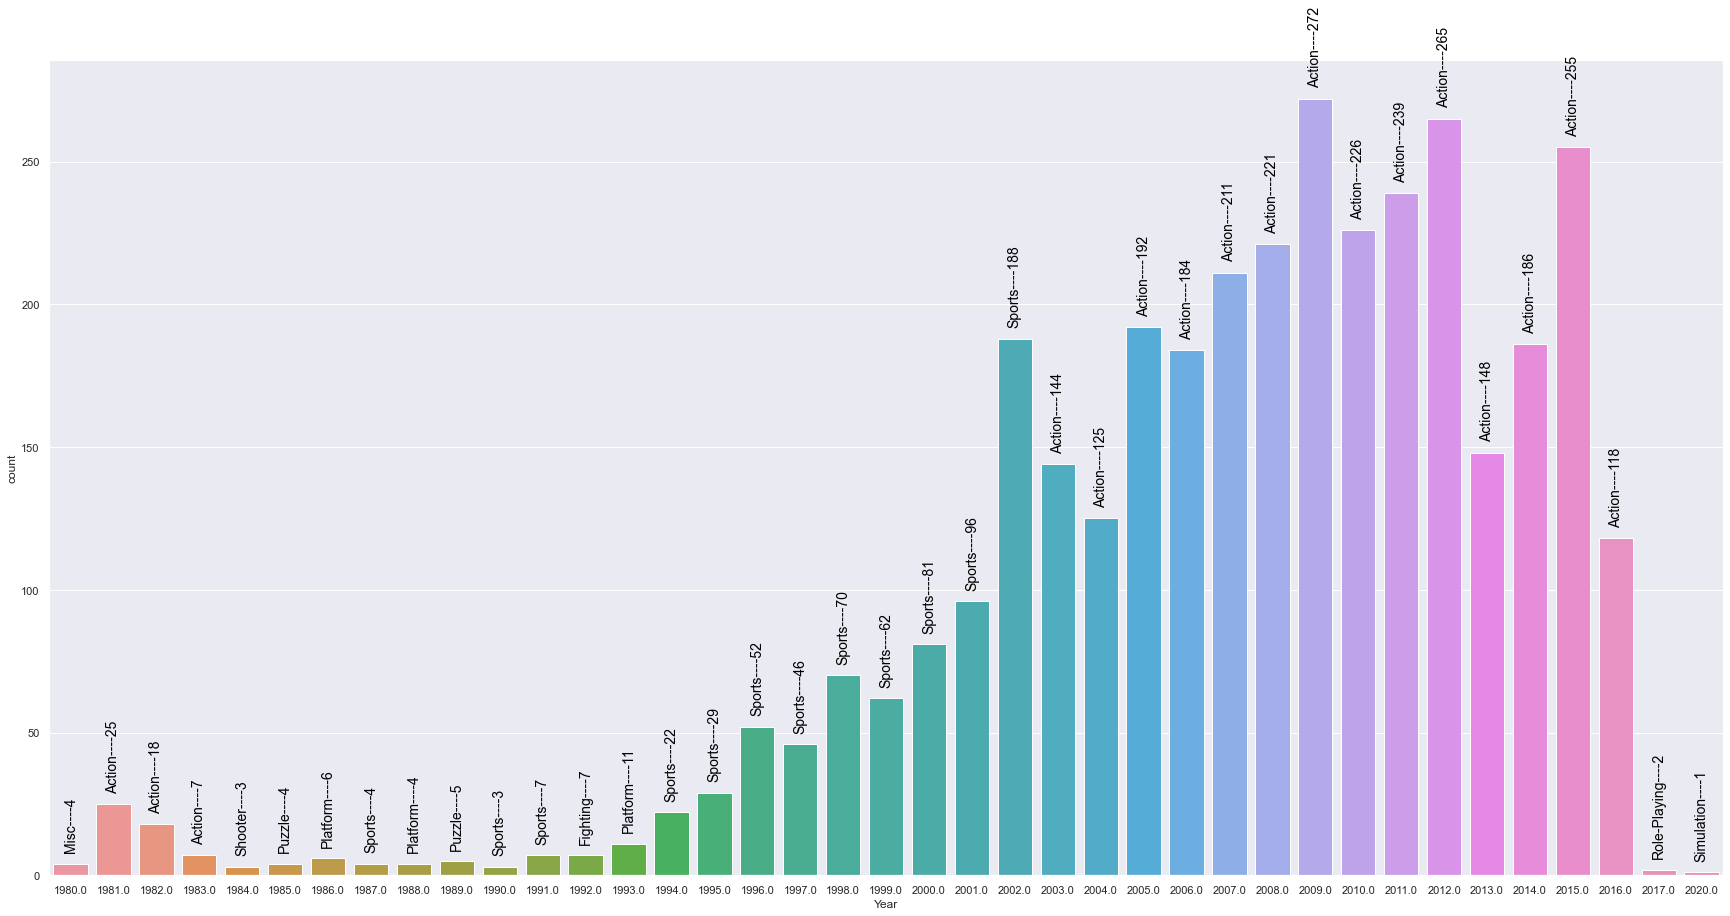

In [108]:
year_max_df = df.groupby(['Year', 'Genre']).size().reset_index(name='count')
year_max_idx = year_max_df.groupby(['Year'])['count'].transform(max) == year_max_df['count']
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)
year_max_genre = year_max_genre.drop_duplicates(subset=["Year", "count"], keep='last').reset_index(drop=True)
genre = year_max_genre['Genre'].values

plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year', y='count', data=year_max_genre)
index = 0
for value in year_max_genre['count'].values:
#     print(asd)
    g.text(index, value + 5, str(genre[index] + '----' +str(value)), color='#000', size=14, rotation= 90, ha="center")
    index += 1

Answer : 

         2009 Action - 272 

         2012 Action - 266 games are released

## Which genre game has sold the most in a single year?

In [109]:
max_sales=df.groupby(['Year','Genre'])['Global_Sales'].sum().reset_index()
index= max_sales.groupby(['Year'])['Global_Sales'].transform(max)==max_sales['Global_Sales']
max_sales=max_sales[index]
max_sales

,Year,Genre,Global_Sales
3,1980.0,Shooter,7.07
5,1981.0,Action,14.84
15,1982.0,Puzzle,10.03
22,1983.0,Platform,6.93
31,1984.0,Shooter,31.10
35,1985.0,Platform,43.17
40,1986.0,Action,13.74
48,1987.0,Fighting,5.42
54,1988.0,Platform,27.73
64,1989.0,Puzzle,37.75


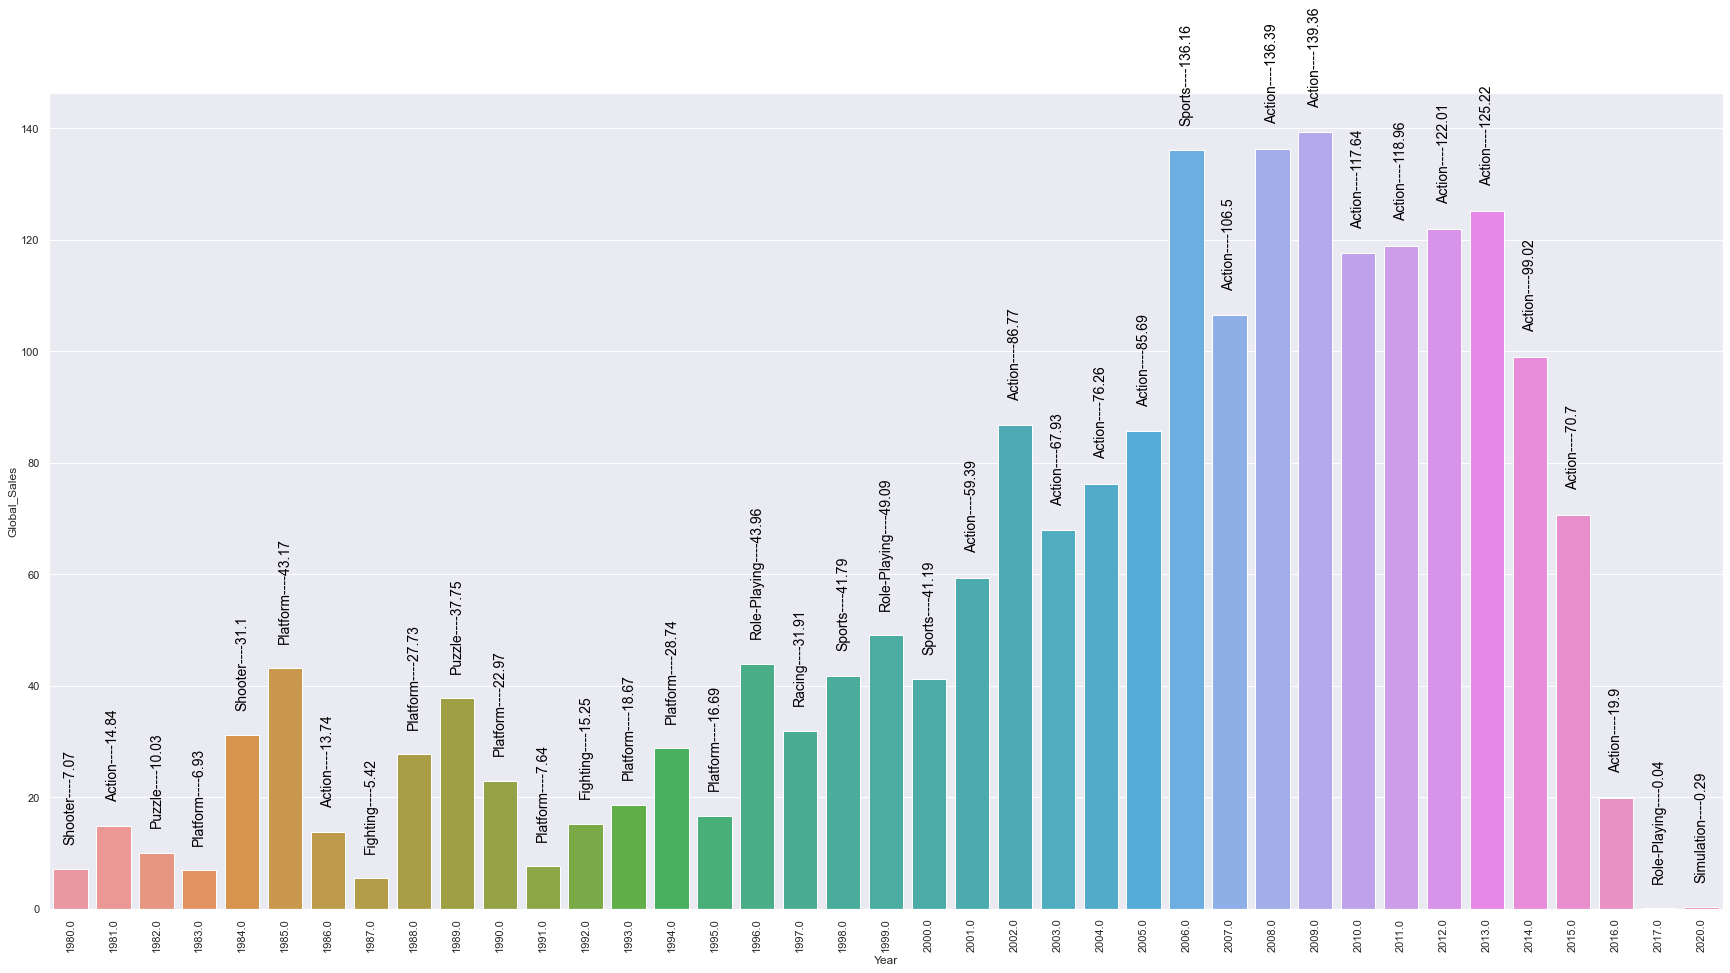

In [110]:
genre=max_sales['Genre'].values
plt.figure(figsize=(30, 15))

plt.xticks(rotation=90)
g = sns.barplot(x='Year',y='Global_Sales',data=max_sales)
index = 0
for value in max_sales['Global_Sales'].values:
    value=round(value,2)
    g.text(index, value + 5, str(genre[index] + '----' +str(value)), color='#000', size=14, rotation= 90, ha="center")
    index += 1


Answer : 2009 Action - 139.36 million and 2008 Action - 136.39 miliion .

In [111]:
df.groupby(['Genre'])['Global_Sales'].sum() .values

array([1722.84,  234.59,  444.05,  789.87,  829.13,  242.21,  726.76,
        923.83, 1026.2 ,  389.98, 1309.24,  173.27])

## Which genre game have the highest sale price globally

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

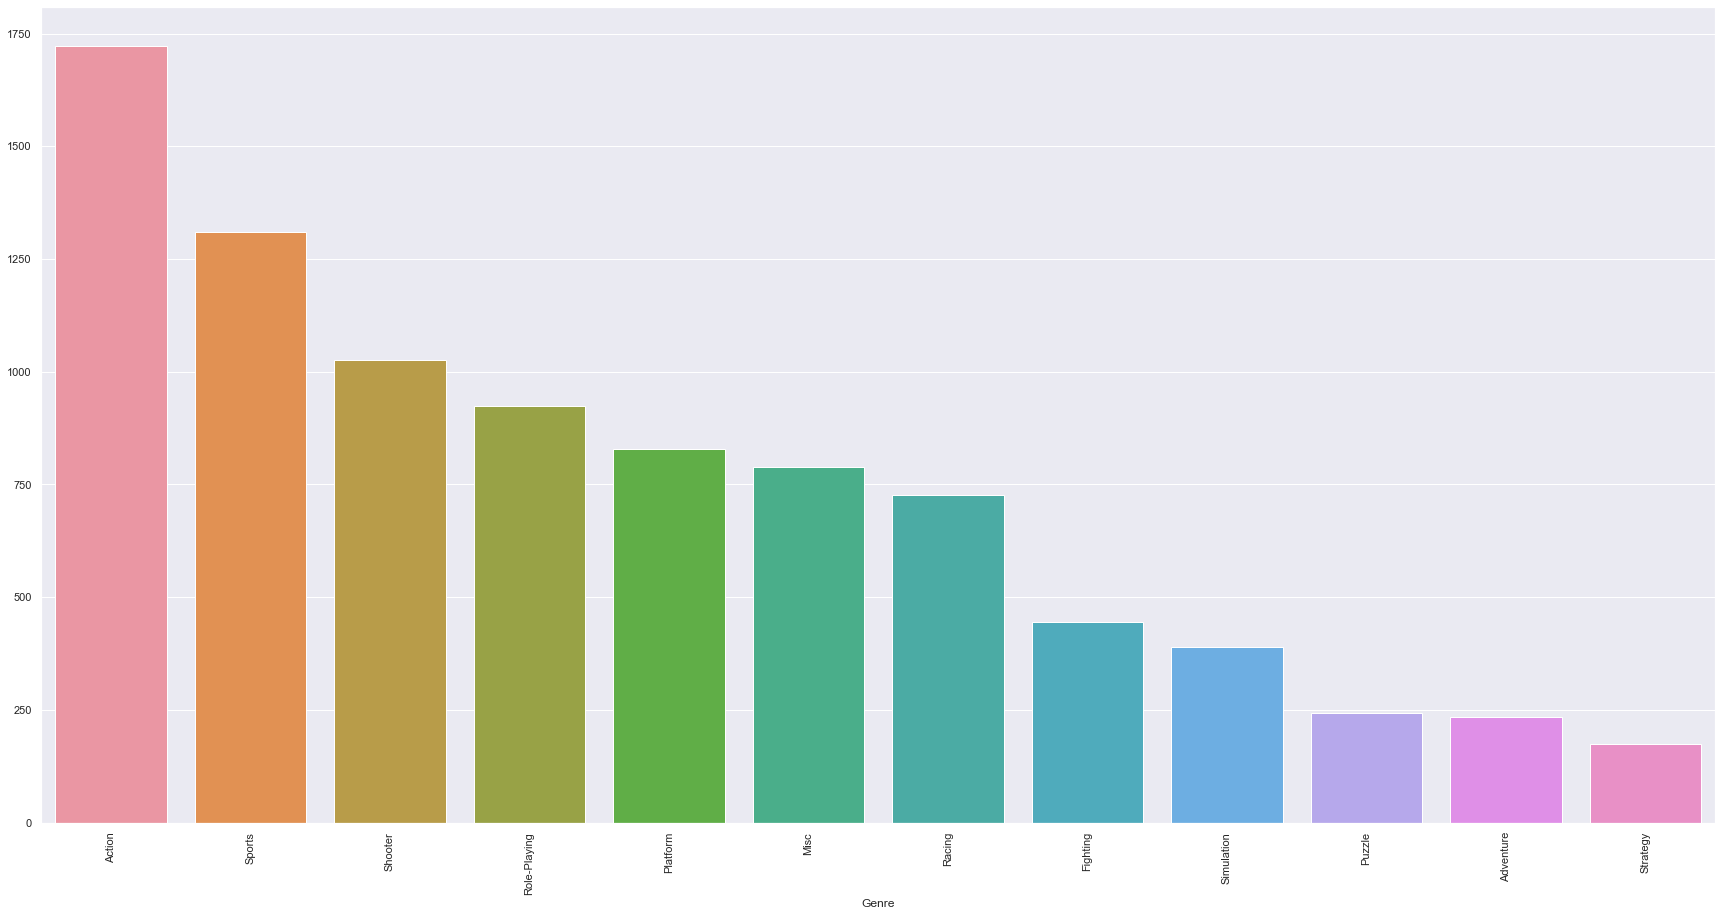

In [112]:
ds=df.groupby(['Genre'])['Global_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(30, 15))
sns.barplot(x=ds.index,y=ds.values )
plt.xticks(rotation=90)

## Which platfrom have the highest sale price globally

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

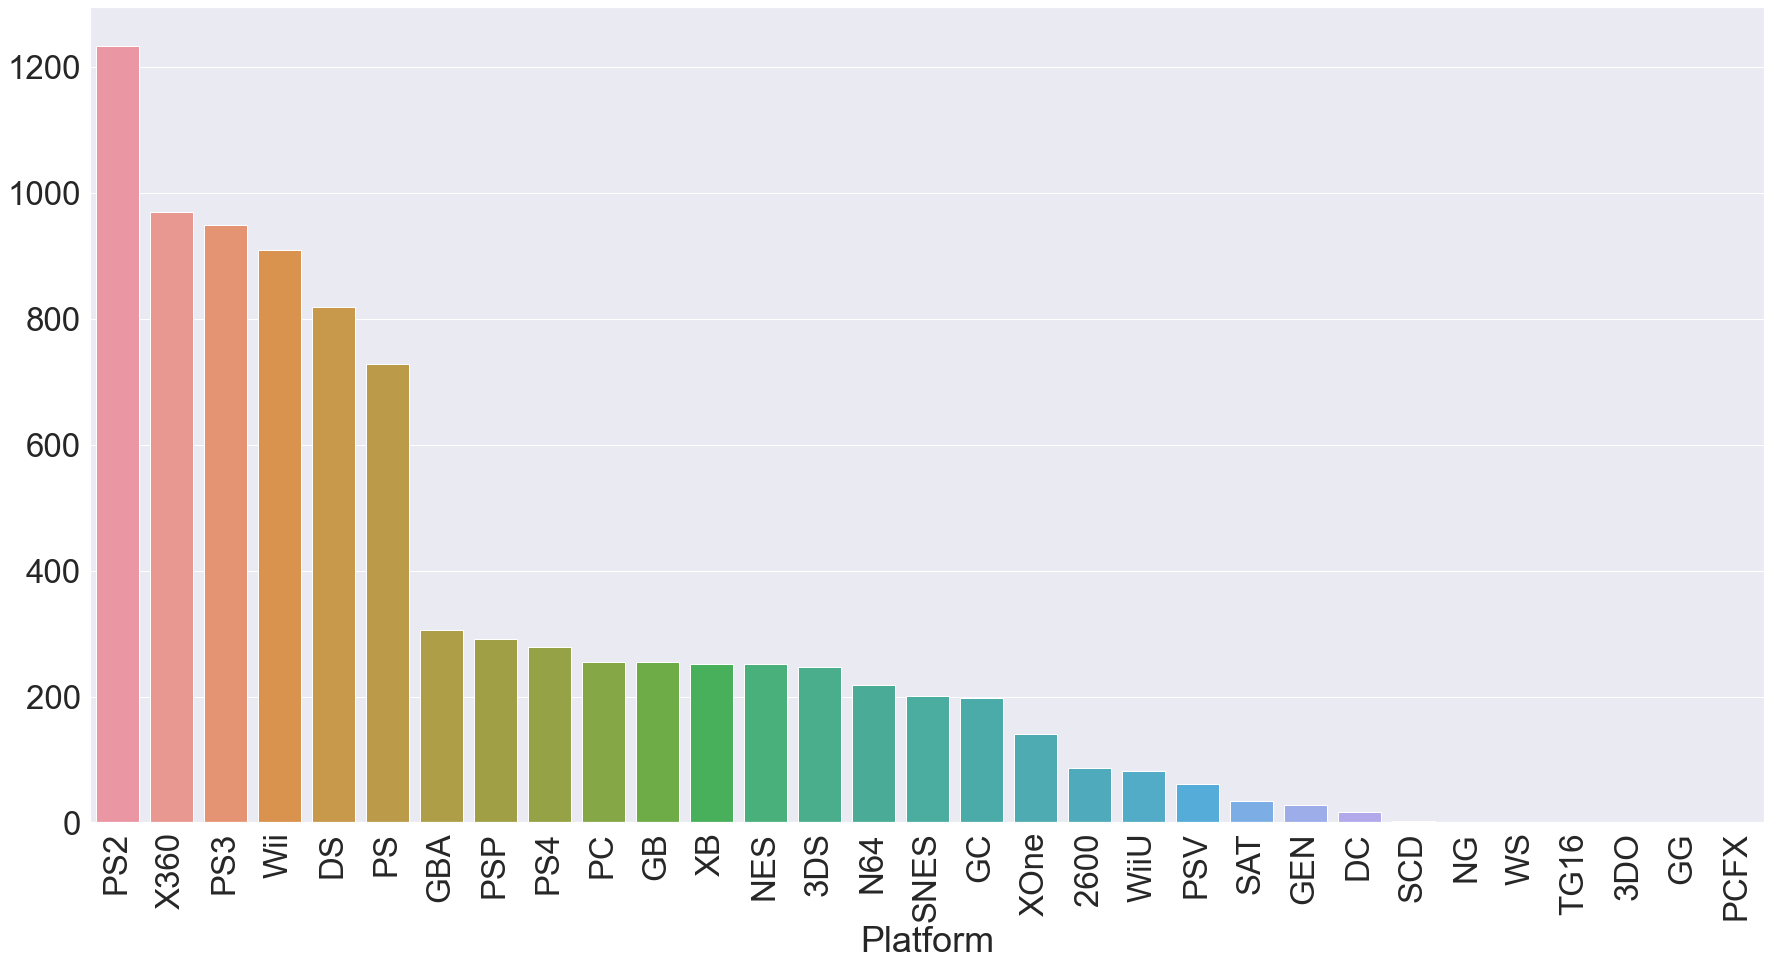

In [113]:

highest_sales=df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(30,15))
sns.set(font_scale=3)
sns.barplot(x=highest_sales.index,y=highest_sales.values )
plt.xticks(rotation=90)

## Which individual game have the highest sale price globally?

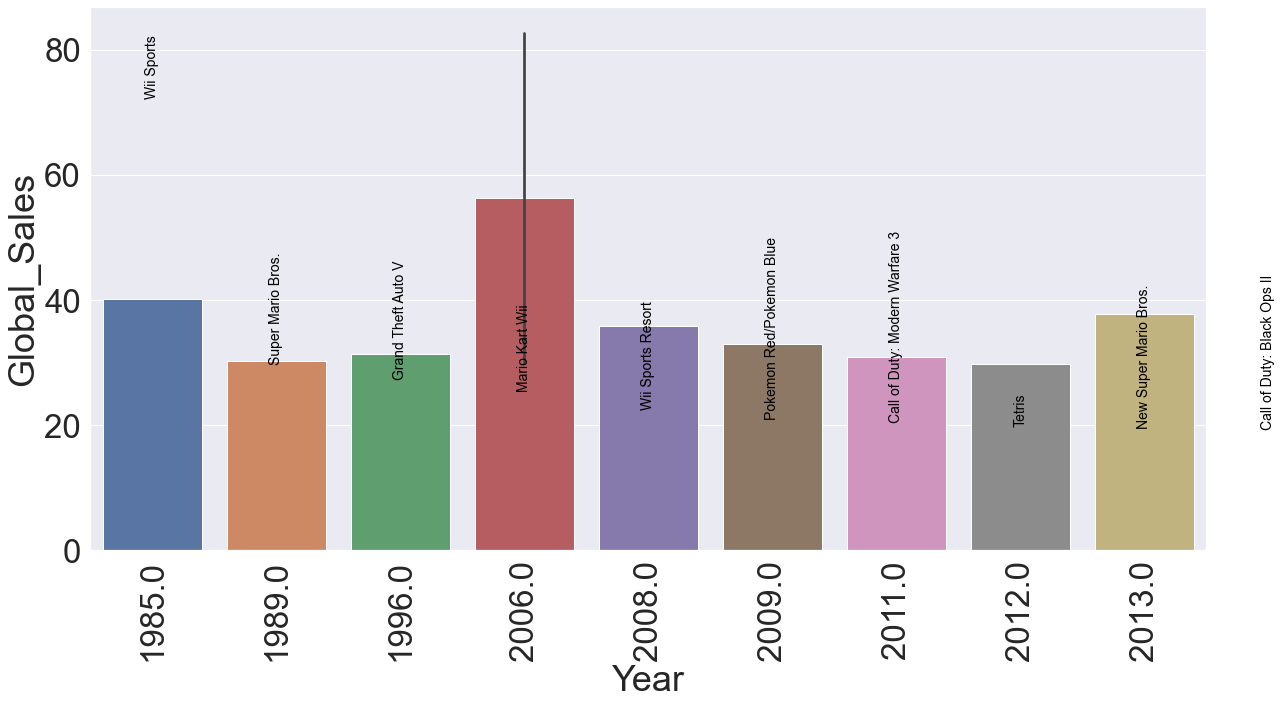

In [114]:

highest_game_sales=df.groupby(['Name' ,'Year'])['Global_Sales'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(20,10))
#sns.set(font_scale=2)
g=sns.barplot(x=highest_game_sales.iloc[:10,1],y=highest_game_sales.iloc[:10,2] )
plt.xticks(rotation=90)

index=highest_game_sales.iloc[:10,0]
v = 0
for value in highest_game_sales.iloc[:10,2]:
    #print(index[v])
    g.text(v, value - 10, index.iloc[v], color='#000', size=14, rotation= 90, ha="center")
    v += 1

## Sales comparison by genre

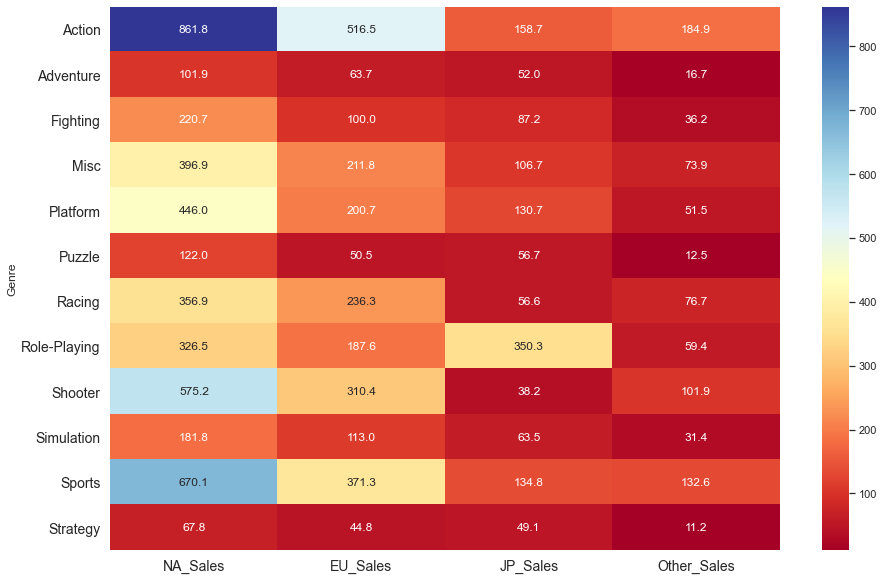

In [115]:
#https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
plt.figure(figsize=(15, 10))
sns.set(font_scale=1)
sns.heatmap(comp_map, annot=True, fmt = '.1f', cmap='RdYlBu')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## Which country have highest sales and in which Genres?

In [116]:
compare_genre = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
compare_map = compare_genre.groupby(by=['Genre']).sum()
compare_table = comp_map.reset_index()
compare_table = pd.melt(compare_table, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
compare_table.head()

,Genre,Sale_Area,Sale_Price
0,Action,NA_Sales,861.77
1,Adventure,NA_Sales,101.93
2,Fighting,NA_Sales,220.74
3,Misc,NA_Sales,396.92
4,Platform,NA_Sales,445.99


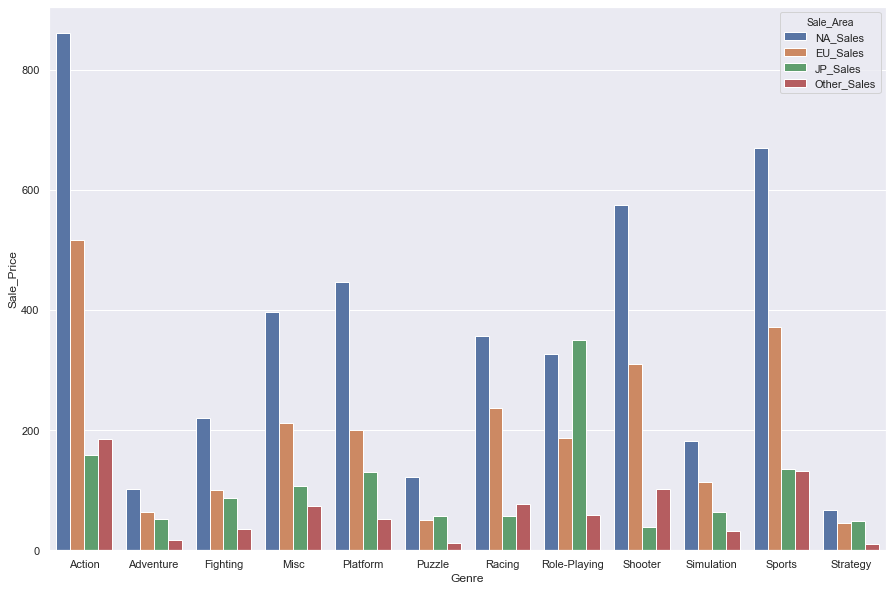

In [117]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Genre', y='Sale_Price', hue='Sale_Area', data=compare_table)

Action ,Shooter and Sports  have much sales when compared to others.NA_sales (North America) has heighest sales every time. 

## Top global sales by publisher

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

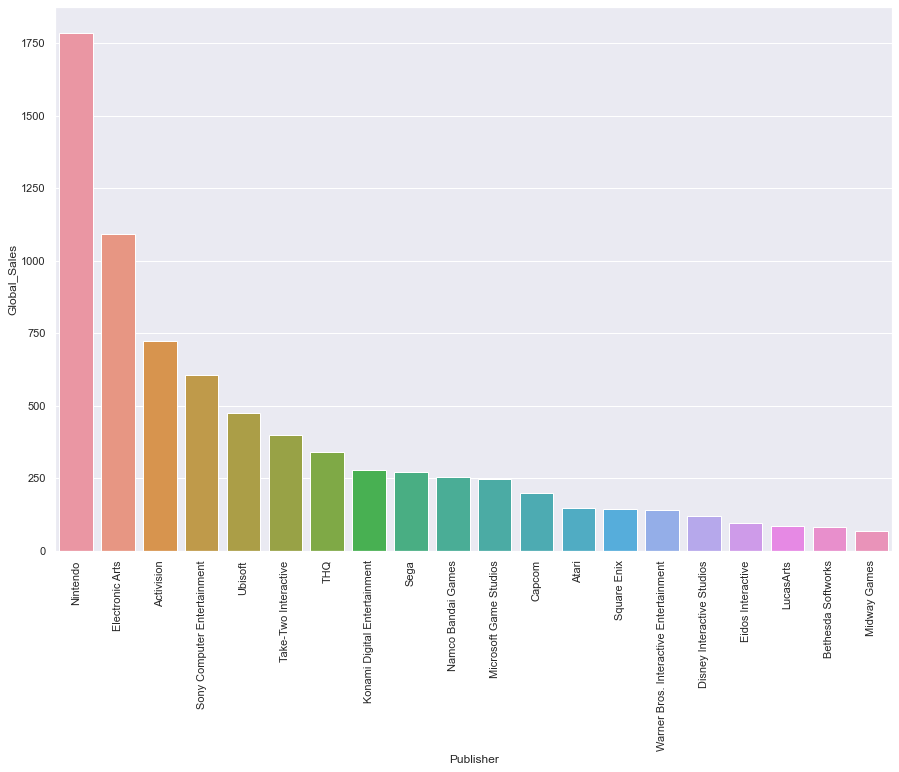

In [118]:

sale_publ = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(20)
sale_publ = pd.DataFrame(sale_pbl).reset_index()

plt.figure(figsize=(15, 10))
sns.barplot(x='Publisher', y='Global_Sales', data=sale_publ)
plt.xticks(rotation=90)

## Total revenue for each region

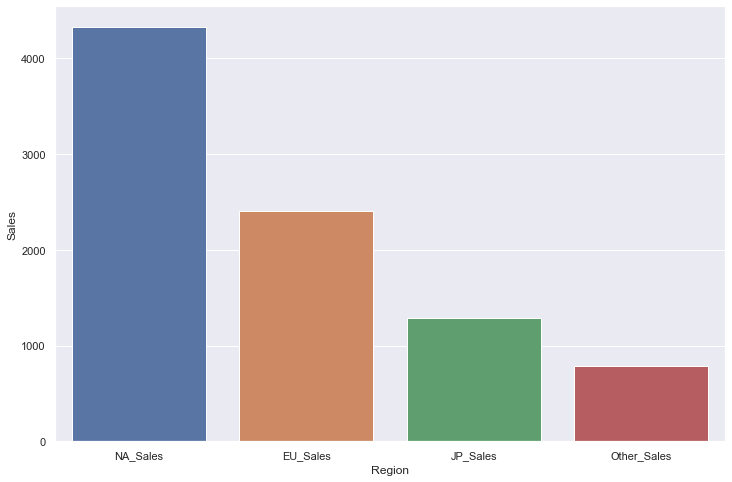

In [119]:
revenue_reg = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()
revenue_reg = revenue_reg.rename(columns={"index": "Region", 0: "Sales"})

#revenue_reg
plt.figure(figsize=(12, 8))
sns.barplot(x='Region', y='Sales', data = revenue_reg)

North America has more sales 